## Diabetes Prediction Machine Learning Model Development

**Problem Statement**

Health authorities are concerned about the rising prevalence of diabetes and its impact on
public health. This dataset provides an opportunity to analyze key factors influencing diabetes
and develop predictive models to identify individuals at high risk. The goal is to provide
actionable insights for health interventions and assist in early diagnosis.


In [1]:
!pip install imbalanced-learn

### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix,  ConfusionMatrixDisplay

import joblib


### Loading the dataset

In [3]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Exploratory Data Analysis

In [4]:
# Checking on the dimensions of the data

df.shape

(100000, 9)

The Dataframe has 100000 rows and 9 columns

In [5]:
# Checking on the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


It can be seen that there are no null values in the dataset and all data types have been categorized accordingly.

In [6]:
# Checking on the summary statistics of the dataset

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


We are able to see the mean, standard deviation, minumum and maximum value, 25th, 50th and 75th percentile of all the columns in the dataset

In [7]:
#Checking for null values

df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Again, there are no  null values

In [8]:
#Checking for duplicate values

df.duplicated().sum()

3854

There are 3854 rows that contain dupolicates that need to be dropped.

In [9]:
#Dropping the duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now, the dataset does not have anny duplicates as there were previously

In [10]:
#Categorizing categorical and non-categorical columns in the dataframe

categorical = []
non_categorical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        non_categorical.append(col)


print('Categorical Columns:\n', categorical)
print('\n\nNon-Categorical Columns\n', non_categorical)

Categorical Columns:
 ['gender', 'smoking_history']


Non-Categorical Columns
 ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


- There are two categorical columns with dtype object i.e, Gender and Smoking History
- There are 7 non-categorical columns with dtypes float or int i.e, Age, Hypertension, Heart Disease, BMI,  HbA1c level, Blood Glucose Level, and Diabetes

### Visualizations

#### 1. Univariate Visualizations

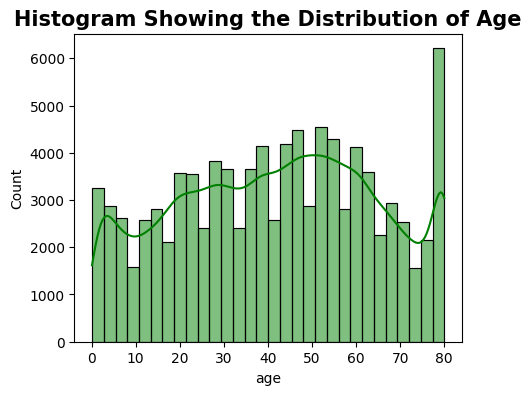

In [11]:
#Histogram showing the distriburion of age

plt.figure(figsize = (5,4))
sns.histplot(x=df['age'], kde = True, color = 'green', bins = 30, edgecolor = 'black')
plt.title('Histogram Showing the Distribution of Age', weight = 'bold', size = 15)
plt.show()

It can be seen that 80 years has the highest number of individuals in the dataset, with more than 6000 people.

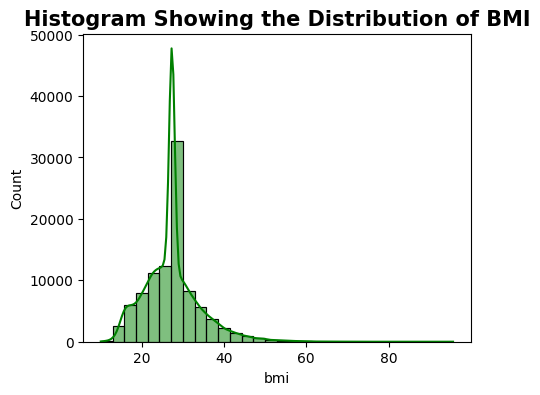

In [12]:
#Histogram showing BMI Distribution

plt.figure(figsize = (5,4))
sns.histplot(x=df['bmi'], kde = True, color = 'green', bins = 30, edgecolor = 'black')
plt.title('Histogram Showing the Distribution of BMI', weight = 'bold', size = 15)
plt.show()

Most individuals are seen to have a BMI of approximately 30, i.e more than 30,000 people.

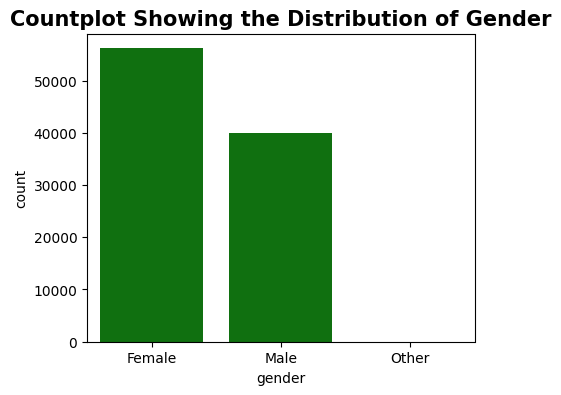

In [13]:
#Countplot showing the distribution of gender

plt.figure(figsize = (5,4))
sns.countplot(x=df['gender'], color = 'green')
plt.title('Countplot Showing the Distribution of Gender', weight = 'bold', size = 15)
plt.show()

There are more females than males in the dataset, with the former having close to 6000 individuals and the latter having approximately 4000 individuals. The other gender is seen to have very few individuals.

<ipython-input-14-976a69443c5b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diabetes'], ax=ax[1], palette=['#343A40', '#2E8B57'])


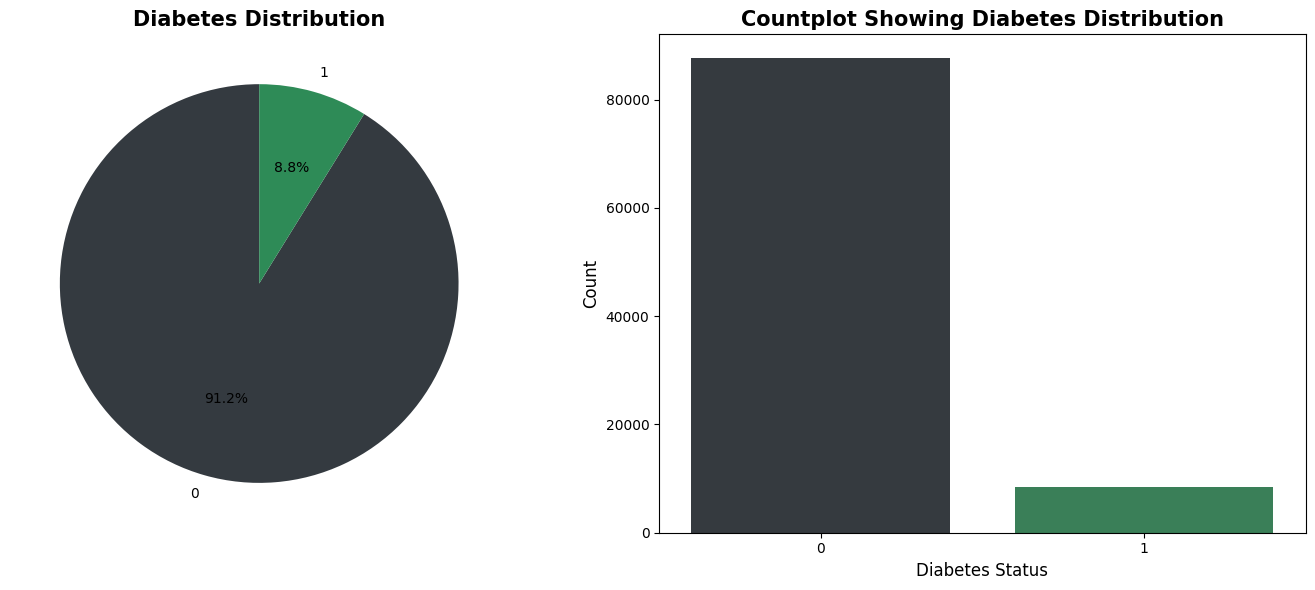

In [14]:
#Piechart and Countplot showing the prevalence of Diabetes

diabetes_counts = df['diabetes'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#343A40', '#2E8B57'])
ax[0].set_title("Diabetes Distribution", weight='bold', size=15)

sns.countplot(x=df['diabetes'], ax=ax[1], palette=['#343A40', '#2E8B57'])
ax[1].set_title("Countplot Showing Diabetes Distribution", weight='bold', size=15)
ax[1].set_xlabel("Diabetes Status", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In the dataset, more than 80,000 individuals are free from diabetes (91.2%), while less that 10,000 (8%) individuals have the disease. This indicates a high level of class imbalance that will be dealth with later.

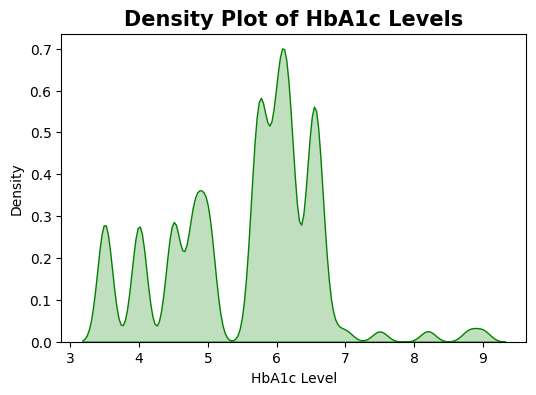

In [15]:
#KDE showing distribution of HbA1c Levels

plt.figure(figsize=(6,4))
sns.kdeplot(df['HbA1c_level'], color='green', fill=True)
plt.title('Density Plot of HbA1c Levels', weight = 'bold', size = 15)
plt.xlabel('HbA1c Level')
plt.ylabel('Density')
plt.show()

The largest peak is around 6, which could represent many individuals with slightly high HbA1c levels. This might include individuals at risk for diabetes (prediabetes stage).

### 2. Multi-Variate Distributions

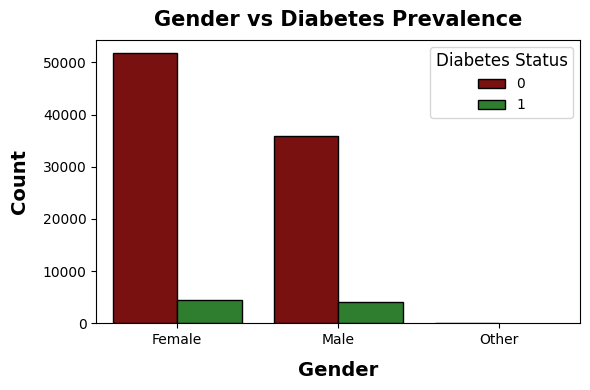

In [16]:
#Countplot showing diabetes distribution among thr genders

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='diabetes', data=df,palette=['#8B0000', '#228B22'], edgecolor='black')
plt.title('Gender vs Diabetes Prevalence', weight='bold', size=15, pad=10)
plt.xlabel('Gender', fontsize=14, labelpad=10, weight='bold')
plt.ylabel('Count', fontsize=14, labelpad=10, weight='bold')
plt.legend(title='Diabetes Status', loc='best', fontsize=10, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()


- The number of females with diabetes is seen to be higher than that of males with approximately 50,000 and 35,000 respectively.
- There is seen to be an equal number of females and males with diabetes, both having approximately 5000 individuals.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


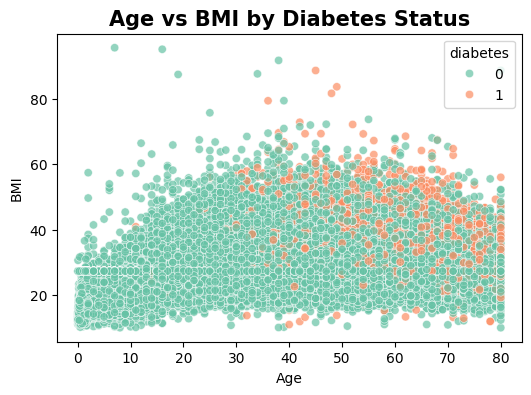

In [17]:
#Scatter plot showing age Vs BMI with Diabetes as the hue

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes', palette="Set2", alpha=0.7)
plt.title('Age vs BMI by Diabetes Status', weight = 'bold', size = 15)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

- Diabetes is seen to be less prevalent in individuals with less than 30 years. Individuals with more thn 50 are seen to be at the highest risk, especially if they have a high BMI of more than 30 units.

<ipython-input-18-abcf9cde1206>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette="Set1")


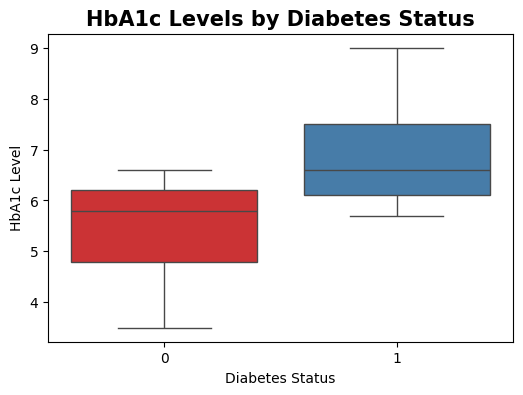

In [18]:
# Box Plot showing HbA1c Levels by Diabetes Status

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette="Set1")
plt.title('HbA1c Levels by Diabetes Status', weight = 'bold', size = 15)
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c Level')
plt.show()

Individuals with no diabetes are seen to have a median level of HbA1c level of less than six, lower than those with diabates, whose HbA1c level is approximately 6.5. This indicates that the higher the level of HbA1c in an individual, the higher the likelihood of getting diabetes.

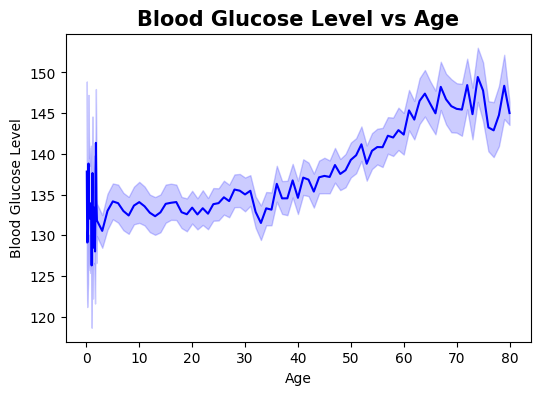

In [19]:
#Line Plot showing Blood Glucose Level vs Age

plt.figure(figsize=(6,4))
sns.lineplot(data=df, x='age', y='blood_glucose_level', color='blue')
plt.title('Blood Glucose Level vs Age', weight = 'bold', size = 15)
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.show()

As an individual's age increases, so does their blood glucose level, particularly in this set of population.

<Figure size 800x600 with 0 Axes>

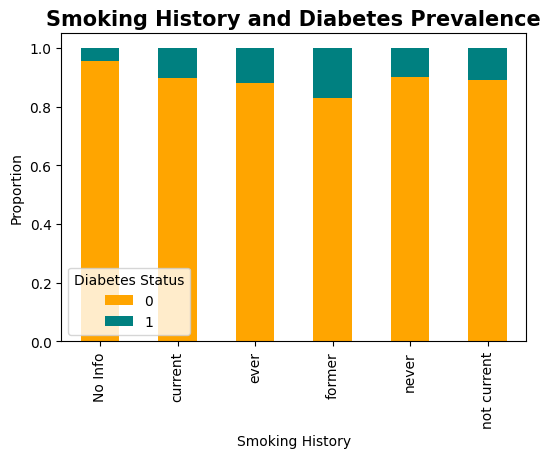

In [20]:
# Stacked Bar Chart showing Smoking History and Diabetes Prevalence

plt.figure(figsize=(8, 6))
smoking_diabetes = pd.crosstab(df['smoking_history'], df['diabetes'], normalize='index')
smoking_diabetes.plot(kind='bar', stacked=True, color=['orange', 'teal'], figsize=(6,4))
plt.title('Smoking History and Diabetes Prevalence', weight = 'bold', size =15)
plt.xlabel('Smoking History')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status', loc = 'best')
plt.show()

Among the Current and Former Smokers, ther is a slightly higher proportion of individuals with diabetes compared to others, showing potential associations between smoking history and diabetes prevalence. Conversly, those who have never smoked are seen to show little association between moking history and diabetes prevalence.

<ipython-input-21-f6fc1a109ad1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_by_age_group = df.groupby('age_group')['diabetes'].mean()


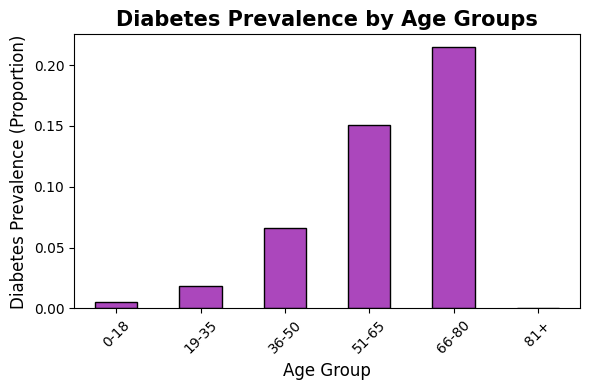

In [21]:
# Bar chart showing Diabetes prevalence by Age Groups

plt.figure(figsize=(6,4))
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80, 100], labels=["0-18", "19-35", "36-50", "51-65", "66-80", "81+"])
diabetes_by_age_group = df.groupby('age_group')['diabetes'].mean()
diabetes_by_age_group.plot(kind='bar', color="#AB47BC", edgecolor="black", figsize=(6,4))
plt.title("Diabetes Prevalence by Age Groups", weight = 'bold', fontsize=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Diabetes Prevalence (Proportion)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Individuals between the age group of 66 and 80 show high diabates prevalence compared to the other populace.

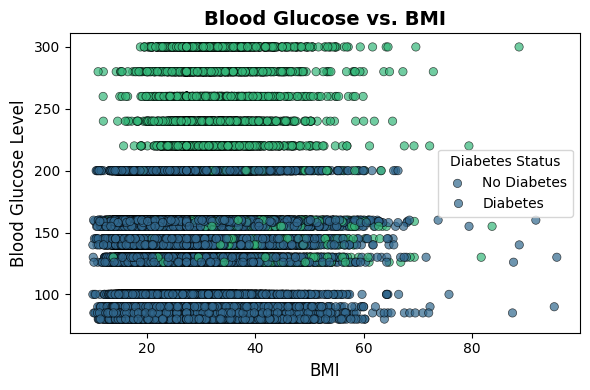

In [22]:
# Scatter plot showing Blood Glucose vs. BMI by Diabetes

plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=df, palette="viridis", alpha=0.7, edgecolor="k")
plt.title("Blood Glucose vs. BMI", weight = 'bold', fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.tight_layout()
plt.show()

- High blood glucose levels are highly associated with individuals with diabetes.
- Additionaly, individuals without diabetes generally have lower blood glucose levels around 100–150 whereas individuals with diabetes tend to have higher blood glucose levels, often above 200.

<ipython-input-23-dde217411d01>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y='bmi', data=df, palette="pastel", scale="width")
<ipython-input-23-dde217411d01>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='diabetes', y='bmi', data=df, palette="pastel", scale="width")


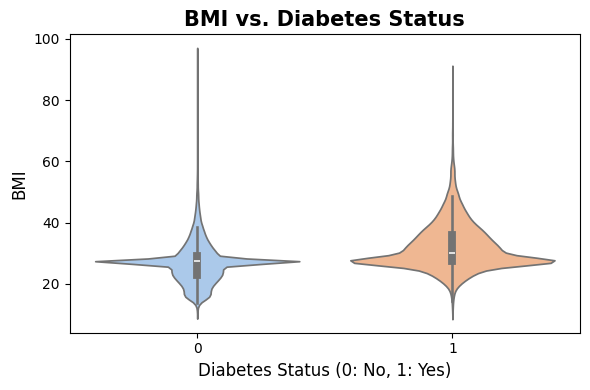

In [23]:
# Violin plot showing BMI vs. Diabetes Status

plt.figure(figsize=(6,4))
sns.violinplot(x='diabetes', y='bmi', data=df, palette="pastel", scale="width")
plt.title("BMI vs. Diabetes Status", weight = 'bold', fontsize=15)
plt.xlabel("Diabetes Status (0: No, 1: Yes)", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.tight_layout()
plt.show()

The violin plot shows that higher BMI may be associated with diabetes.

<ipython-input-24-b4c7c53f7959>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


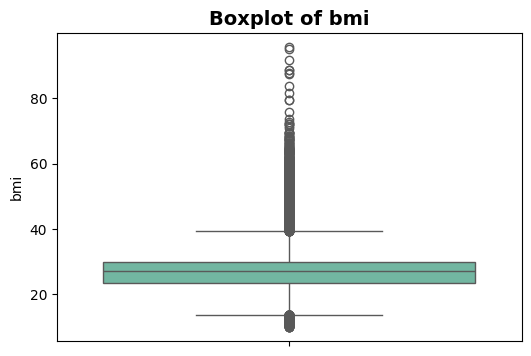

<ipython-input-24-b4c7c53f7959>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


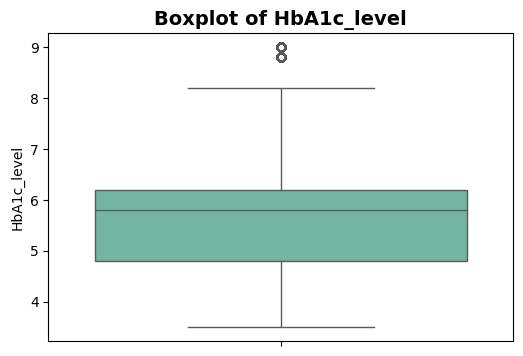

<ipython-input-24-b4c7c53f7959>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


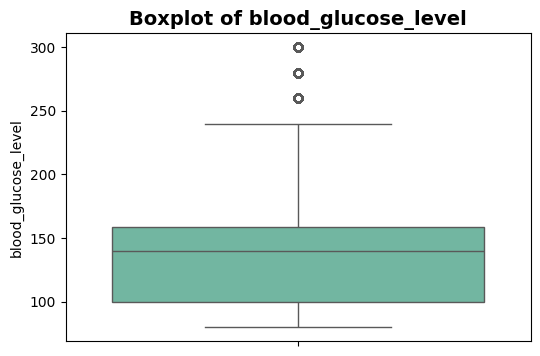

<ipython-input-24-b4c7c53f7959>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


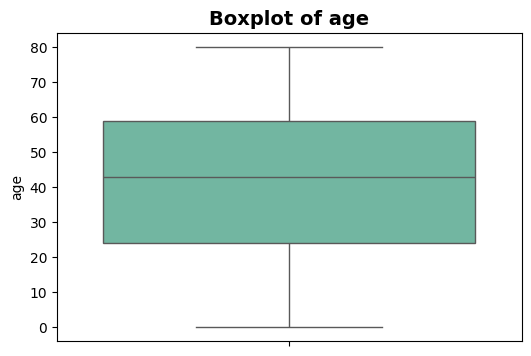

In [24]:
#Checking for outliers using a boxplot

cols = ['bmi', 'HbA1c_level', 'blood_glucose_level', 'age']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}", size = 14, weight = 'bold')
    plt.show()


- Some of the columns are seen to have values above and below the upper and lower limit, respectively, and since the the dataset involves diabetes diagnosis, it is paramount to consider all values as critical to help make accurate predictions. Therefore, the outliers will not be dropped.

In [25]:
#Dropping the age group column

df.drop(columns='age_group', inplace = True)

In [26]:
#Label encoding

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


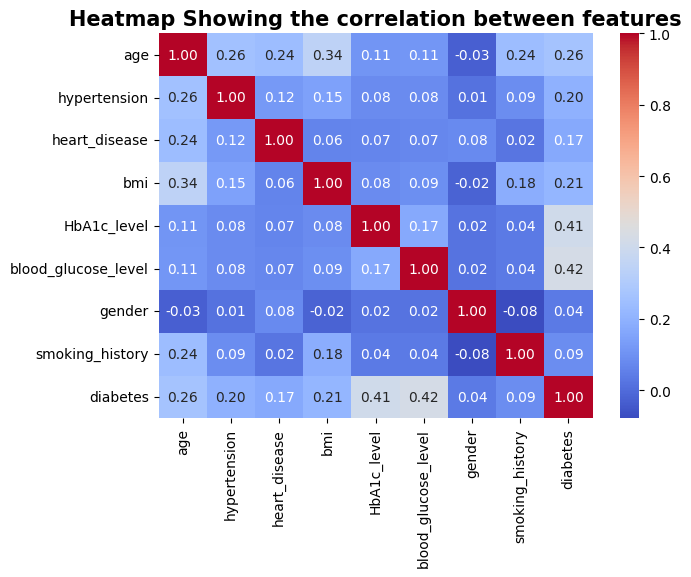

In [27]:
#Heatmap

cols = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'smoking_history', 'diabetes']]

matrix = cols.corr()

plt.figure(figsize=(7,5))
sns.heatmap(matrix, cmap='coolwarm', annot = True, fmt = '.2f')
plt.title('Heatmap Showing the correlation between features', size = 15, weight = 'bold')
plt.show()

- HbA1c_level (0.26): The strongest positive correlation with diabetes among the features, indicating that individuals with higher HbA1c levels are more likely to have diabetes.
- blood_glucose_level (0.22): A moderate positive correlation, as expected since elevated blood glucose is a common indicator of diabetes.
- age (0.22): Older individuals are slightly more likely to have diabetes, as age often correlates with chronic conditions.
- bmi (0.15): A weaker positive correlation, suggesting that higher BMI may have some relationship with diabetes but is not as strong as HbA1c_level or blood_glucose_level.
- hypertension (0.16) and heart_disease (0.15): Both show mild correlations with diabetes, likely reflecting shared risk factors.
- gender and smoking history show minimal correlation with diabetes, suggesting they may not be significant predictors.

### Feature Engineering



In [28]:
X = df.drop(columns=['diabetes', 'smoking_history', 'gender'], axis = 1)
y = df['diabetes']

### Standard scaling the X column

In [29]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [30]:
# #Saving the model
# joblib.dump(scaler, 'scaler.pkl')

### Splitting the dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=42)

### Model Development

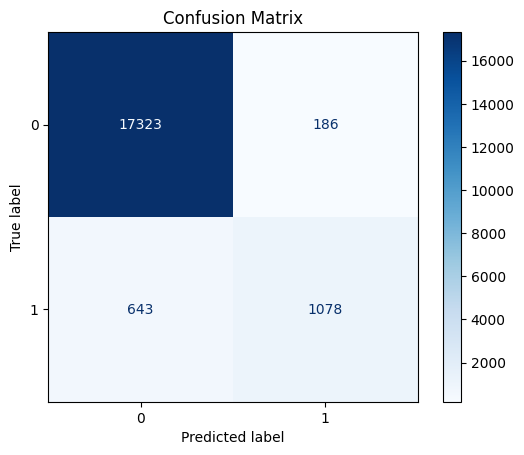

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [32]:
# Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, lr_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, lr_pred)
print("Classification Report:\n", report)

- The logistic regression model is seen to have a very high accuracy score of 0.96.
- On the other hand, the class 1 f1 score is a bit low at 0.73, which is a bit decent, considering the low recall score that was obtained in class 1. This is seen to be caused by the witnessed class imbalance on the target variable.

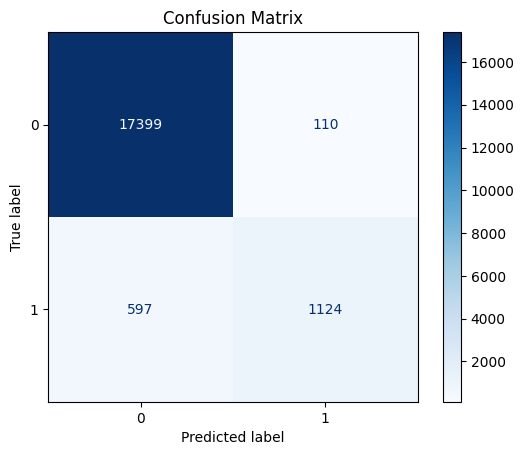

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.91      0.65      0.76      1721

    accuracy                           0.96     19230
   macro avg       0.94      0.82      0.87     19230
weighted avg       0.96      0.96      0.96     19230



In [33]:
#K-Nearest Neighbor classifier model

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, knn_pred)
print("Classification Report:\n", report)

- The KNN classifier model is seen to have a very high accuracy score of 0.96.
- On the other hand, the class 1 f1 score is a bit low at 0.77, which is a bit decent, considering the low recall score that was obtained in class 1. This is seen to be caused by the witnessed class imbalance on the target variable.

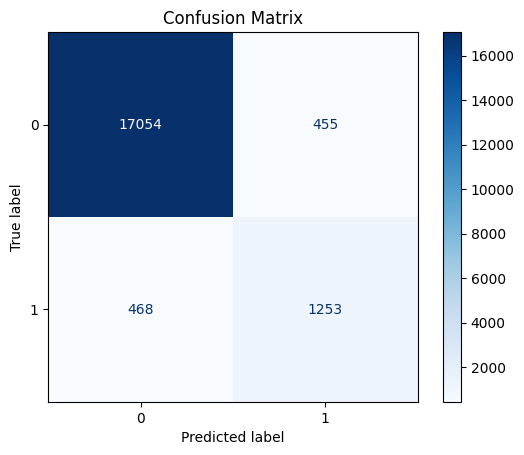

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.73      0.73      0.73      1721

    accuracy                           0.95     19230
   macro avg       0.85      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



In [34]:
#Decision Tree Classifier Model


dt = DecisionTreeClassifier(class_weight='balanced')

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, dt_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, dt_pred)
print("Classification Report:\n", report)

- The Decision Tree classifier model is seen to have a very high accuracy score of 0.95.
- On the other hand, the class 1 f1 score is 0.73, indicating an above moderate harmonic mean between the recall and precision scores in both classes 0 and 1.

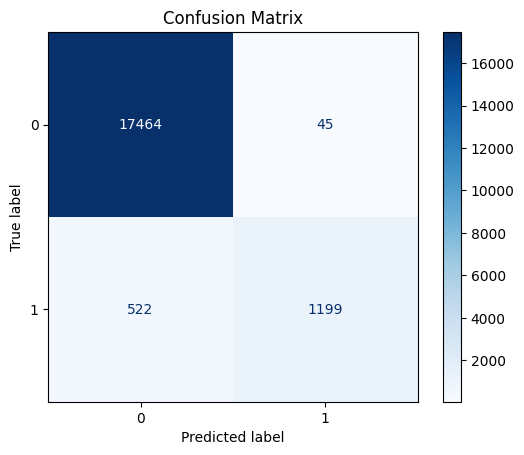

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.70      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.85      0.90     19230
weighted avg       0.97      0.97      0.97     19230



In [35]:
# XGB Classifier Model

xgb1 = XGBClassifier()

xgb1.fit(X_train, y_train)
xgb1_pred = xgb1.predict(X_test)
cm = confusion_matrix(y_test, xgb1_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb1.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, xgb1_pred)
print("Classification Report:\n", report)

- The XGBoost classifier model is seen to have a very high accuracy score of 0.97.
- On the other hand, the f1 score is at 0.81 for class 1, which is generally high compared to the previous models used. This indicates that the model can correctly predict class 1 values 81% correctly.

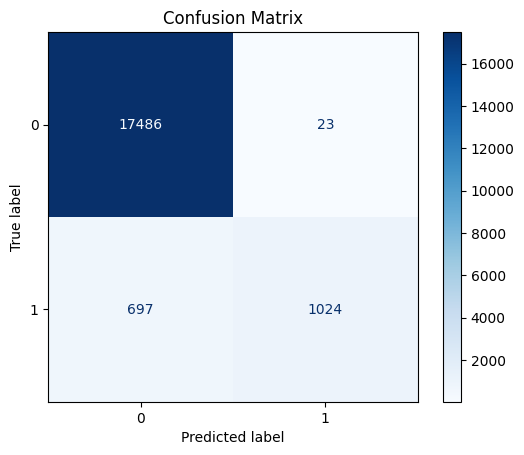

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.98      0.60      0.74      1721

    accuracy                           0.96     19230
   macro avg       0.97      0.80      0.86     19230
weighted avg       0.96      0.96      0.96     19230



In [36]:
#SVM Model

svc = SVC()

svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, svc_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, svc_pred)
print("Classification Report:\n", report)

The SVC classifier model is seen to have a very high accuracy score of 0.96.
On the other hand, the f1 score is at 0.74 for class 1, which is generally OK. This indicates that the model can correctly predict class 1 values 74% correctly.

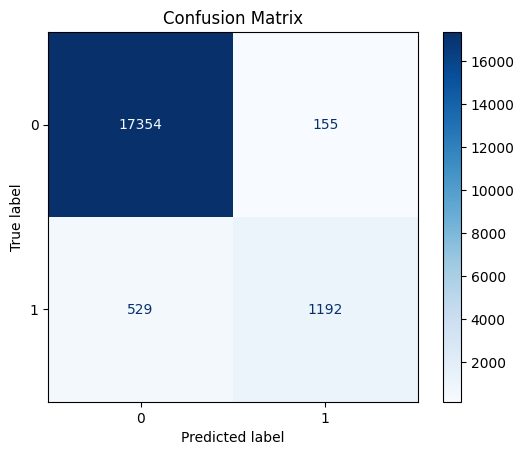

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.88      0.69      0.78      1721

    accuracy                           0.96     19230
   macro avg       0.93      0.84      0.88     19230
weighted avg       0.96      0.96      0.96     19230



In [37]:
#Random Forest Classifier

rf1 = RandomForestClassifier(class_weight = 'balanced')

rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)
cm = confusion_matrix(y_test, rf1_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, rf1_pred)
print("Classification Report:\n", report)

The Random Forest classifier model is seen to have a very high accuracy score of 0.97. On the other hand, the f1 score is at 0.78 for class 1, which is generally OK. This indicates that the model can correctly predict class 1 values 78% correctly.

In [38]:
# param_distributions_rf = {
#     'n_estimators': [50, 100, 200],          # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
#     'max_features': ['sqrt', 'log2'],       # Number of features to consider for the best split
# }

# # Set up RandomizedSearchCV
# random_search_rf = RandomizedSearchCV(
#     estimator=rf1,
#     param_distributions=param_distributions_rf,  # Use param_distributions instead of param_grid
#     n_iter=50,               # Number of parameter combinations to try
#     cv=5,                    # 5-fold cross-validation
#     scoring='accuracy',      # Scoring metric
# )

# # Fit RandomizedSearchCV
# random_search_rf.fit(X_train, y_train)

# # Display best parameters and score
# print("Random Forest - RandomizedSearchCV Best Parameters:", random_search_rf.best_params_)
# print("Random Forest - RandomizedSearchCV Best Cross-Validation Score:", random_search_rf.best_score_)

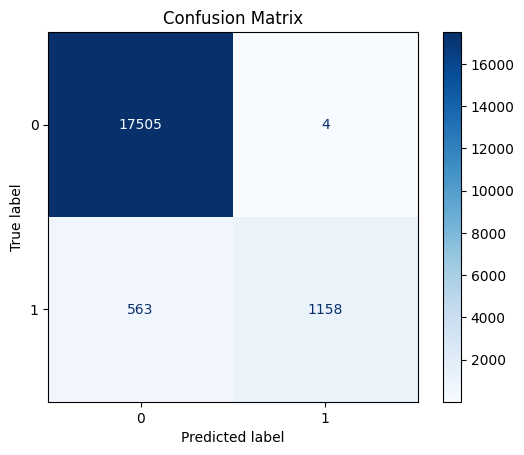

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [39]:
#Applying the Hyperparameters


rf = RandomForestClassifier(n_estimators = 50, max_features = 'sqrt', max_depth = 10)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, rf_pred)
print("Classification Report:\n", report)

The F1 score has increased to 0.81 after hyperparameter tuning.

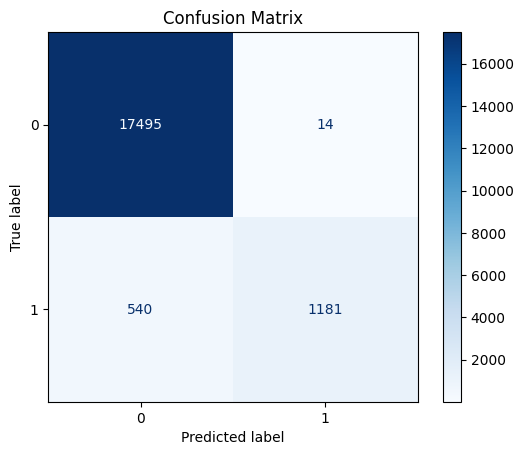

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



In [40]:
#Gradient Boosting classifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, gb_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, gb_pred)
print("Classification Report:\n", report)

The Gradient Boost classifier model is seen to have a very high accuracy score of 0.97.
On the other hand, the f1 score is at 0.81 for class 1 and 0.98 for class 0, which is generally high. This indicates that the model can correctly predict class 1 values 81% correctly.

In [41]:
# #Hyper parameter Tuning

# # Define parameter distributions for GradientBoostingClassifier
# param_distributions_gb = {
#     'n_estimators': [50, 100, 200], # Number of boosting stages
#     'learning_rate': [0.01, 0.1, 0.2, 0.3], # Step size to shrink the model in each stage
#     'max_depth': [3, 5, 10, 15], # Maximum depth of each tree
#     'subsample': [0.7, 0.8, 1.0], # Proportion of samples used for fitting each base learner
#     'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 5], # Minimum number of samples required to be at a leaf node
#     'max_features': ['sqrt', 'log2', None], # Number of features to consider at each split
# }

# # Set up the Gradient Boosting classifier
# gb_model = GradientBoostingClassifier()

# # Set up RandomizedSearchCV
# random_search_gb = RandomizedSearchCV(
#     estimator=gb_model,
#     param_distributions=param_distributions_gb,
#     n_iter=50, # Number of parameter combinations to try
#     cv=5, # 5-fold cross-validation
#     scoring='accuracy', # Scoring metric
#     random_state=42, # Ensure reproducibility
#     n_jobs=-1 # Use all available cores
# )

# # Fit RandomizedSearchCV
# random_search_gb.fit(X_train, y_train)

# # Display best parameters and score
# print("Gradient Boosting - RandomizedSearchCV Best Parameters:", random_search_gb.best_params_)
# print("Gradient Boosting - RandomizedSearchCV Best Cross-Validation Score:", random_search_gb.best_score_)


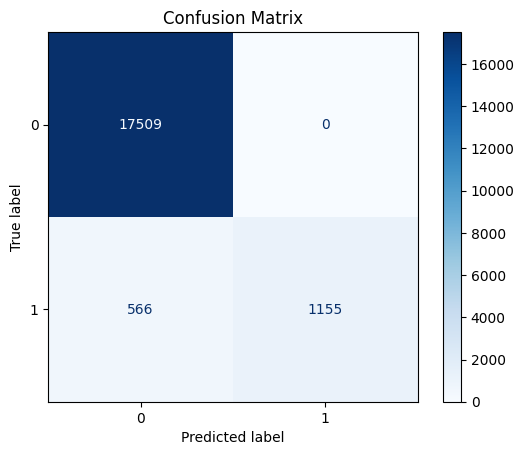

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [42]:
#Gradient Boosting classifier

gb1 = GradientBoostingClassifier(subsample= 0.8, n_estimators =200, min_samples_split= 10, min_samples_leaf= 2, max_features= None, max_depth= 5, learning_rate= 0.01)

gb1.fit(X_train, y_train)
gb1_pred = gb1.predict(X_test)
cm = confusion_matrix(y_test, gb1_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb1.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, gb1_pred)
print("Classification Report:\n", report)

With the tuned gradient Boost Classifier, the f1 score of the model remained similar to the untuned one, indicating no improvement.

After performing SMOTE to help with the class imbalance, I opted to leave it out due it its ineffectiveness because instead of increasing the low f1 scores, it reduced it.

Given the exemplary performance of both the XGBoost and Gradient Boosting Classifier models, I decided to proceed with one of them, particularly the Gradient Boost Model.

### Feature Importance

In [43]:
importance = gb.feature_importances_
features = X.columns

importance = pd.DataFrame({
    'Features' : features,
    'Importance': importance
}).sort_values(by = 'Importance', ascending = False)

importance

,Features,Importance
4,HbA1c_level,0.641486
5,blood_glucose_level,0.320032
0,age,0.022232
3,bmi,0.009395
1,hypertension,0.004078
2,heart_disease,0.002777


- According to the Feature Importance dataframe, HbA1c level is seen as the most important feature, with an importance of 0.64. This indicates that the varaible is highly likely to assist in predicting whether one has diabetes or not.
- This is followed by blood glucose level whose feature importance has a value of 0.3, then age at 0.02.
- BMI, Hypertension, and heart disease have low importance when it comes to predicting the likelihood of whether one has diabetes or not.

### Plotting the feature importance

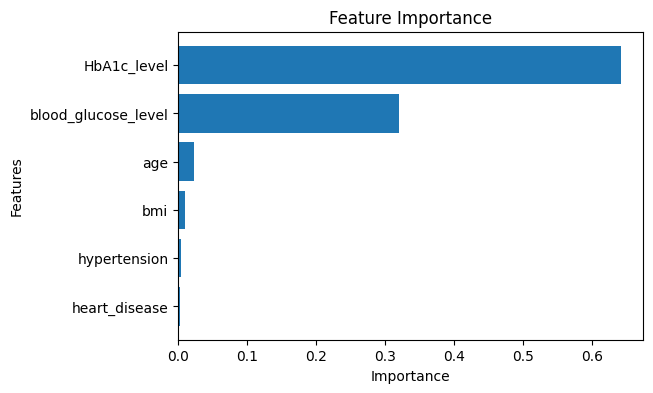

In [44]:
importance_sorted = importance.sort_values(by="Importance", ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(6, 4))
plt.barh(y=importance_sorted['Features'], width=importance_sorted['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


- The visual above can be used to describe the important features in descending order on how they affect the outcome of an individual as far as diabetes prediction is concerned.

### Saving the model

In [45]:
joblib.dump(gb, 'Model_gb1.pkl')
print('Model has been saved successfully')

Model has been saved successfully


The gradient boost model has been saved as a pkl file, and it will be deployed using streamlit for future predictions.


## **Recommendations for Mitigating Diabetes Risk:**




1. Actionable Insights Based on the Findings

- It has been noted that high HbA1c and Blood Glucose Levels are significant factors that predespose one to getting diabetes. Such individuals should regulary monitor the above levels and consult healthcare providers to explore early interventions strategies including lifestyle changes and exercise.
- The model identifies age as a significant predictor of diabetes. Older individuals (people older that 45 years) are more likely to develop diabetes. Regular screening for this group is highly recommended.
- The presence of heart disease and hypertension strongly correlates with diabetes. Patients with these conditions should be considered high-risk and should engage in wellness activities that focus on managing diabates.
- High BMI (of more than 30 units) is a major risk factor for diabetes. Individuals in this category need to incorporate weight management plans focusing on healthy eating and physical activity.


2. Targeted Interventions for High-Risk Groups

- The identified high-risk groups are seen to be individuals older than 45, those with conditions such as hypertension and heart disease, and those with high BMI, HbA1c, and blood glucose levels.
- Interventions that can be done to such groups include changing of diets to a more healthy one that has a lot of meat and vegetables and doing away with sugar. Also, these individuals are encouraged to engage in physical activities such as going to the gym and doing compound exercises. Additionally, they need to prioritize regular diabetes screenings, especially those with a family history of the condition.
- Generally, it is advisable for these targeted indiviuals to get education on the importance of health checkups to help promote early diagnosis. Sophisticated tools and technologies such as machine learning models are seen to be useful in ensuring that such diseases are identified for mitigation actions to take place as early as possible.